In [1]:
import os
from scipy.io import loadmat
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# the following import is required for matplotlib < 3.2:
from mpl_toolkits.mplot3d import Axes3D  # noqa
import mne

In [2]:
# load raw
subject_id = 1
tasktime = 1 # 1-pre, 2-post
raw_path = os.path.join('..', '..', '..', 'data', str(subject_id), 'raw_' + str(subject_id) + '_' + str(tasktime) + '.fif')
raw = mne.io.read_raw_fif(raw_path, preload=True)
# raw.plot()

Opening raw data file ..\..\..\data\1\raw_1_1.fif...
    Range : 0 ... 3865075 =      0.000 ...   805.224 secs
Ready.
Reading 0 ... 3865075  =      0.000 ...   805.224 secs...


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_10344\3171909114.py:5: RuntimeWarning: This filename (..\..\..\data\1\raw_1_1.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(raw_path, preload=True)


NOTE: plot_raw_psd() is a legacy function. New code should use Raw.compute_psd().plot().
Effective window size : 0.427 (s)


c:\ProgramData\anaconda3\envs\brain\Lib\site-packages\mne\viz\utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


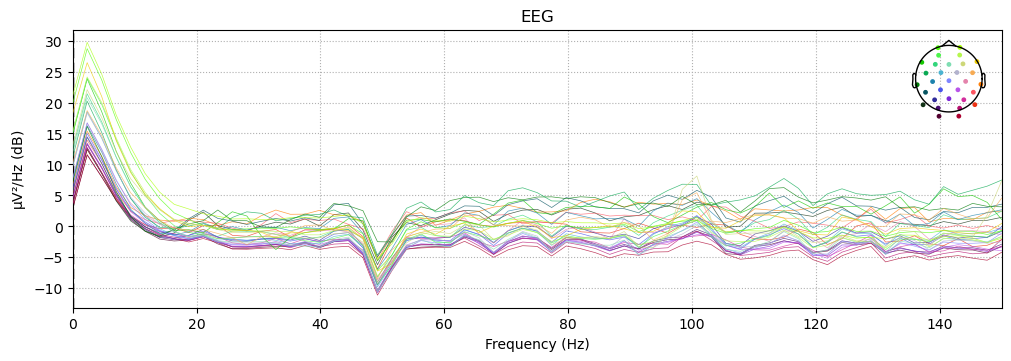

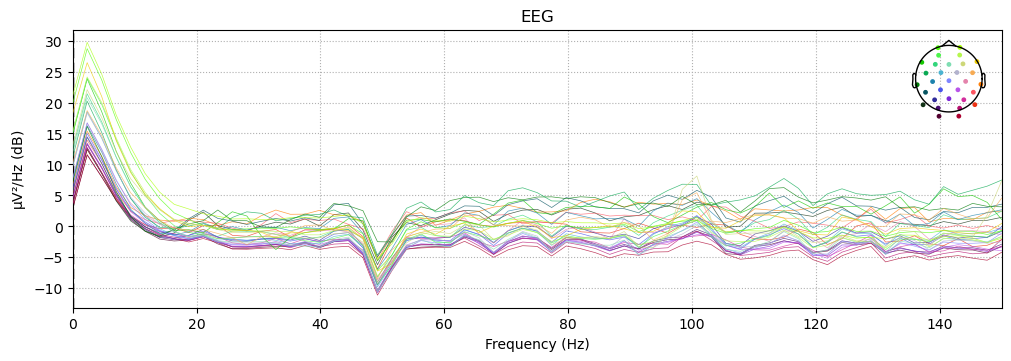

In [3]:
# check psd
mne.viz.plot_raw_psd(raw, fmax=150, spatial_colors=True)

In [4]:
raw.plot()

Using qt as 2D backend.


Channels marked as bad:
none


In [4]:
# # filtering and resampling
# # Apply low-pass filter
# raw_filtered = raw.copy().filter(l_freq=None, h_freq=50)

# # Resample the data
# sfreq = 600
# raw_resampled = raw_filtered.copy().resample(sfreq=sfreq)

# # Plot the power spectral density (PSD) of the original data
# psd_obj = raw.compute_psd(fmax=100)
# mne.viz.plot_raw_psd(raw, fmax=100, spatial_colors=True)

# # Plot the PSD of the resampled data
# raw_resampled.plot_psd()
# psd_obj = raw_resampled.compute_psd(fmax=100)
# mne.viz.plot_raw_psd(raw_resampled, fmax=100, spatial_colors=True)

In [5]:
# ica
raw_filtered = raw.copy() # raw already filtered
n_components = 32  # Number of ICA components (adjust as needed)
ica = mne.preprocessing.ICA(n_components=n_components, random_state=97, method='picard')
ica.fit(raw_filtered)
# ica.plot_components()
ica.plot_sources(raw_filtered)

Fitting ICA to data using 32 channels (please be patient, this may take a while)
Selecting by number: 32 components
Fitting ICA took 47.1s.
Creating RawArray with float64 data, n_channels=32, n_times=647874
    Range : 0 ... 647873 =      0.000 ...   539.894 secs
Ready.
Using qt as 2D backend.


120 events found
Event IDs: [1]
Not setting metadata
120 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 120 events and 6097 original time points ...


1 bad epochs dropped
Applying ICA to Epochs instance
    Transforming to ICA space (32 components)
    Zeroing out 0 ICA components
    Projecting back using 32 PCA components


C:\Users\Tianyi Zheng\AppData\Local\Temp\ipykernel_26848\1573317896.py:12: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  ica_epochs = ica.apply(epochs.copy(), exclude=ica.exclude)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


c:\ProgramData\anaconda3\envs\brain\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\ProgramData\anaconda3\envs\brain\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


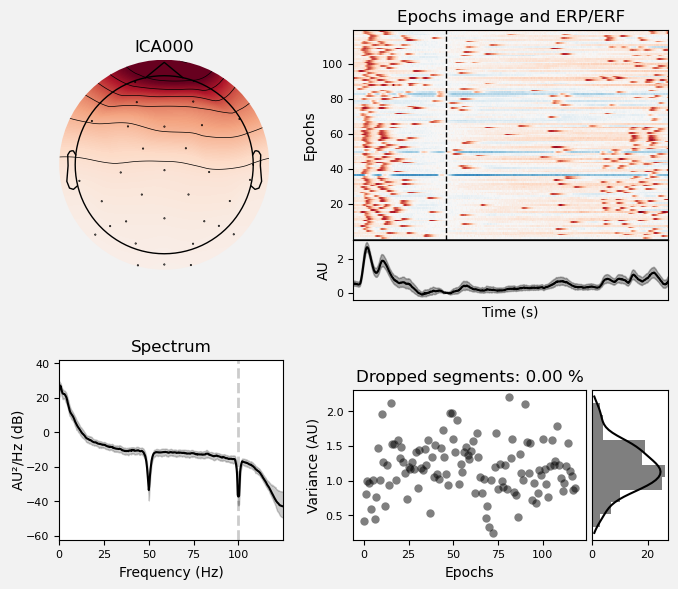

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


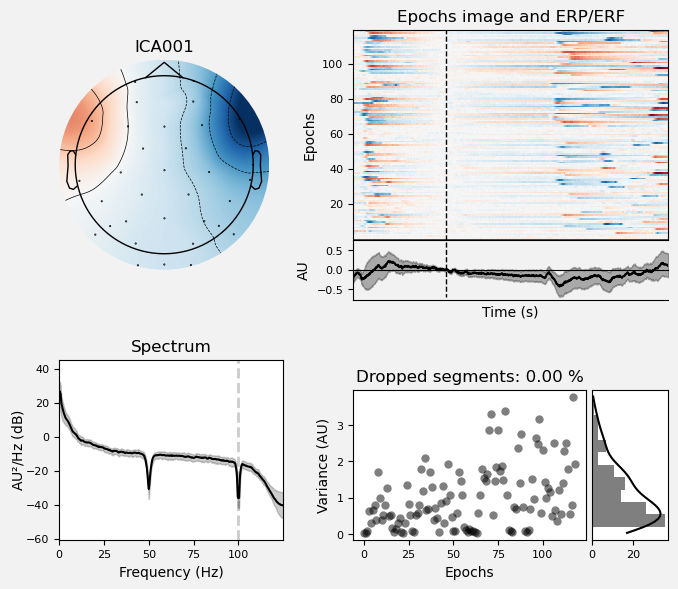

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


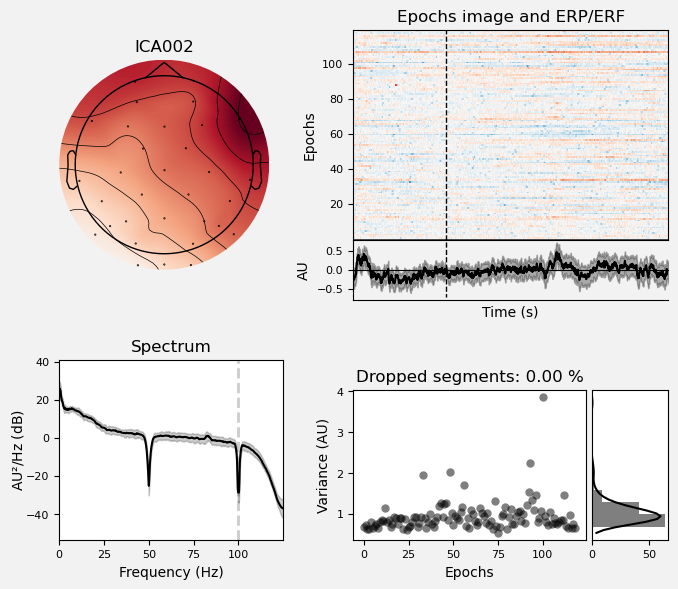

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


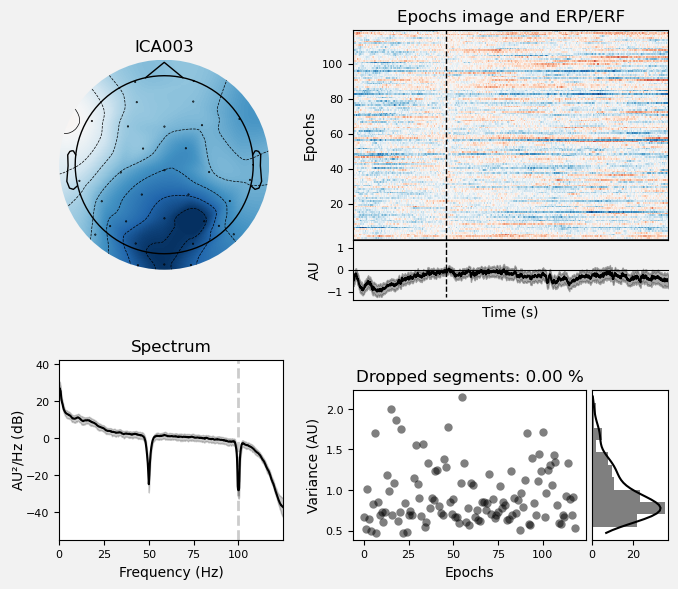

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


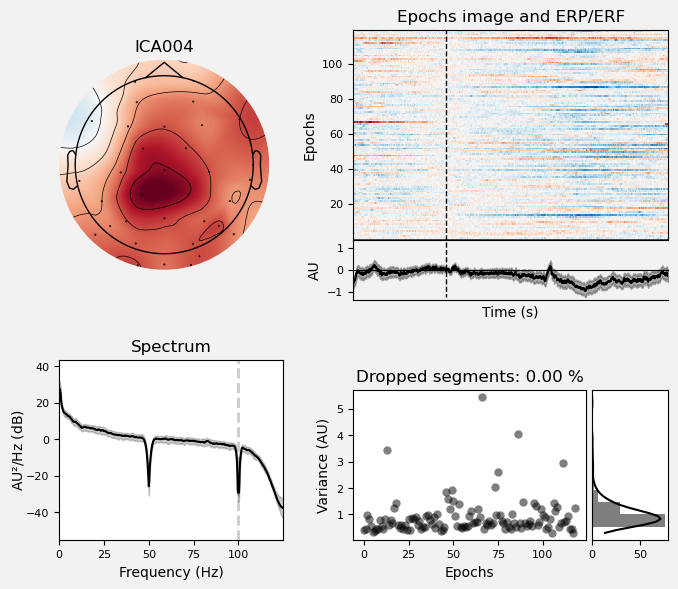

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


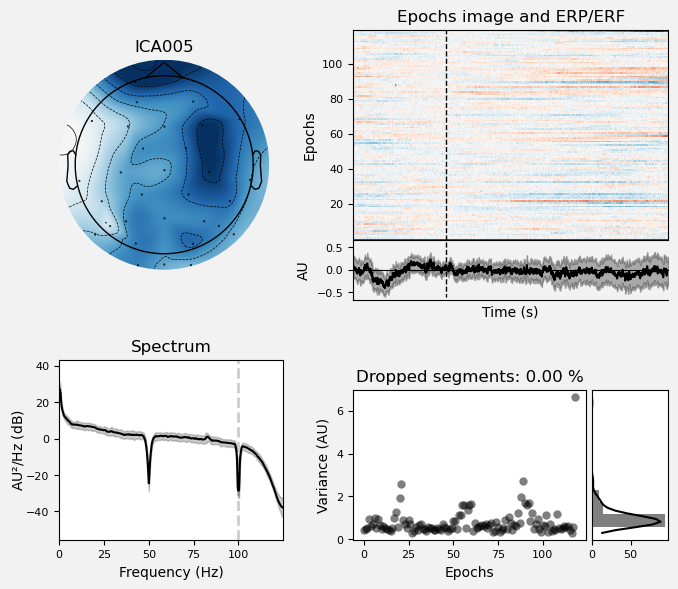

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


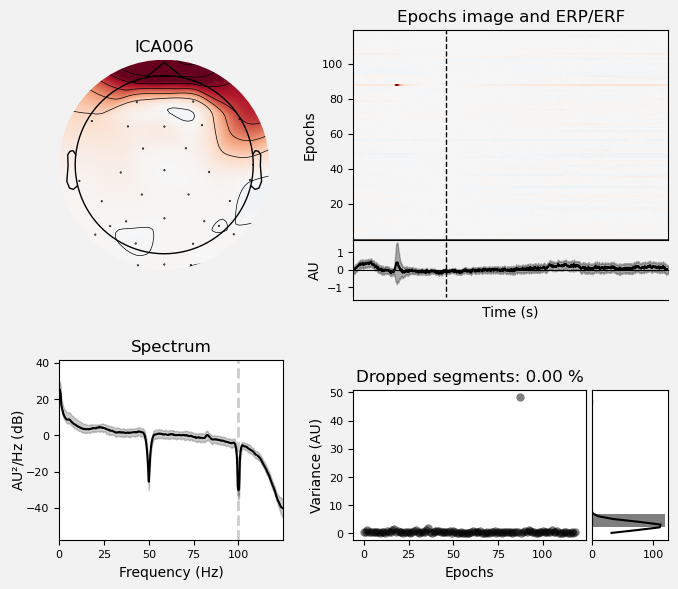

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


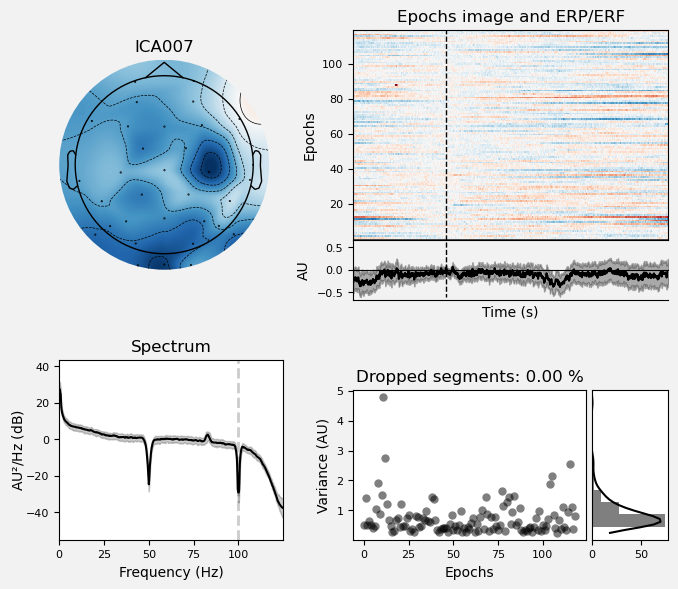

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


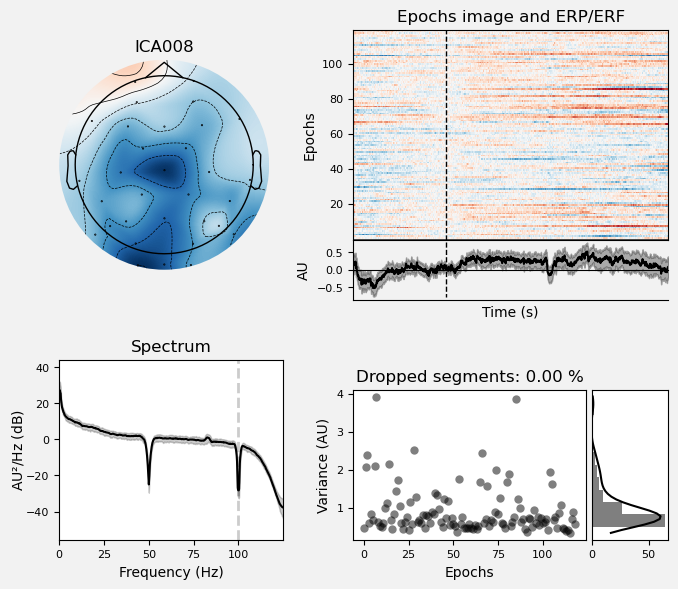

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


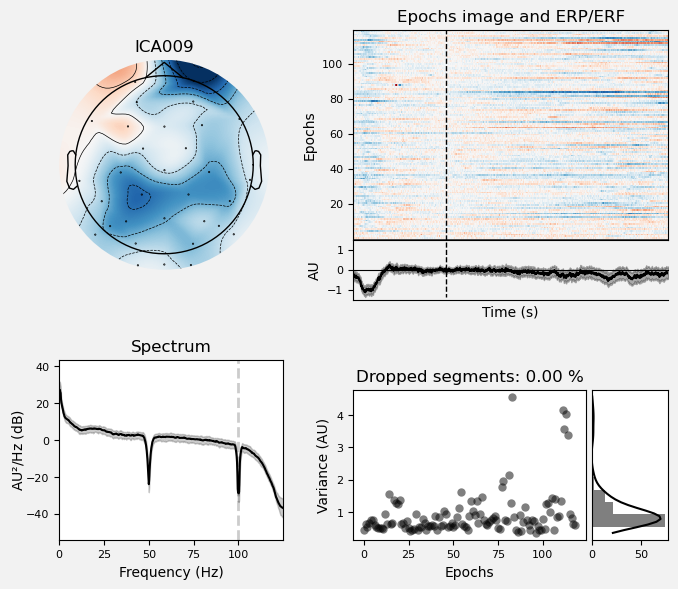

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


c:\ProgramData\anaconda3\envs\brain\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
c:\ProgramData\anaconda3\envs\brain\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


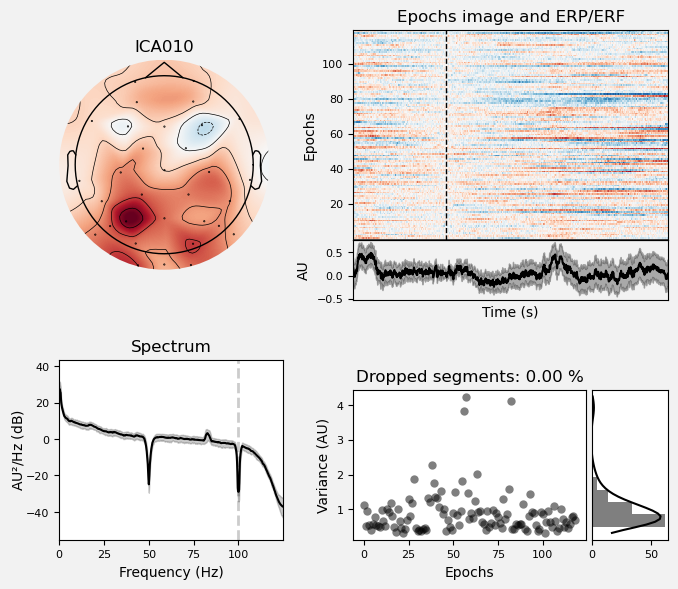

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


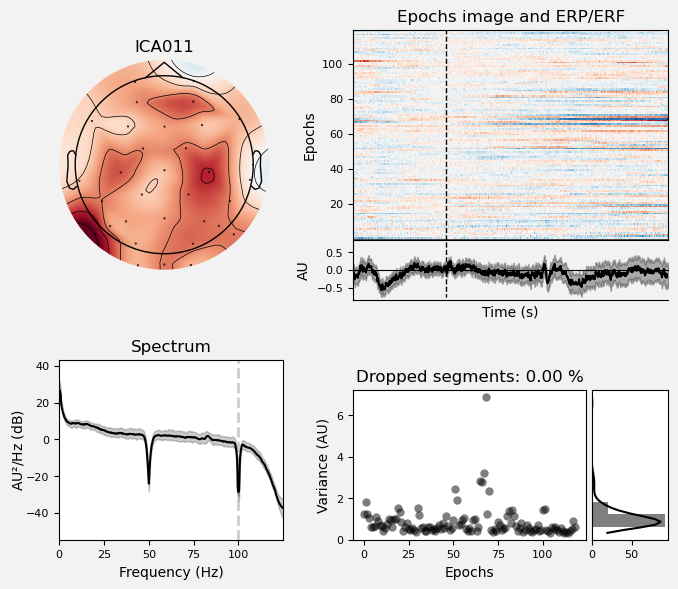

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


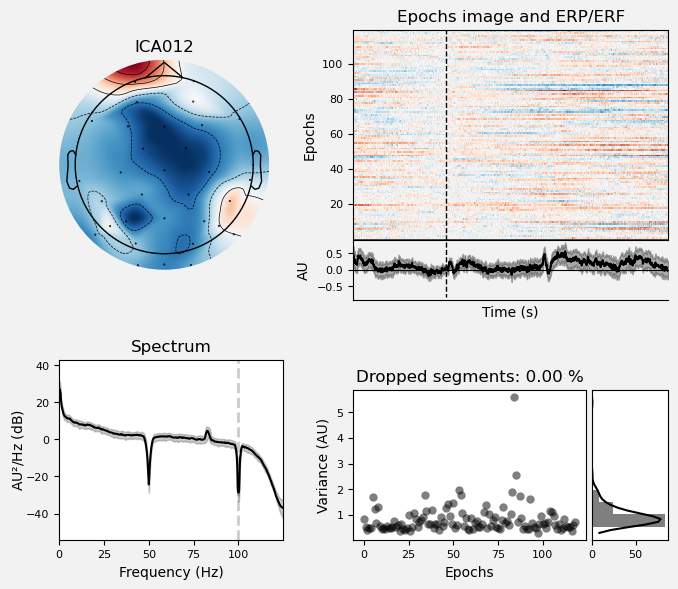

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


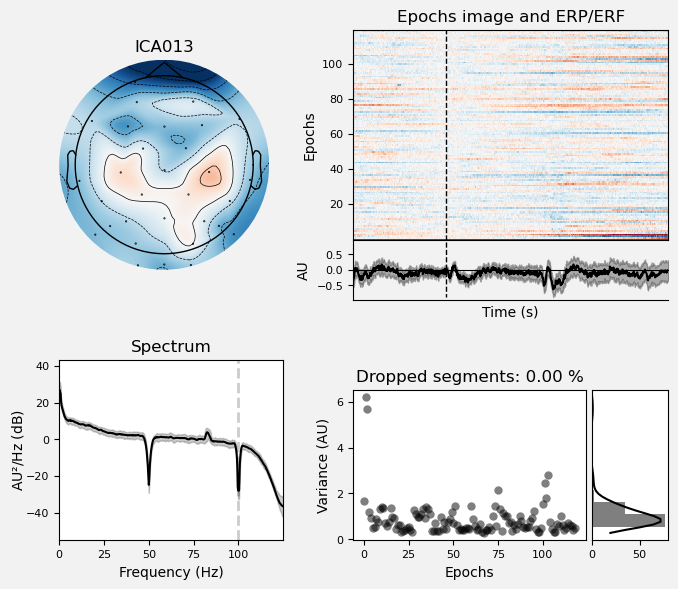

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


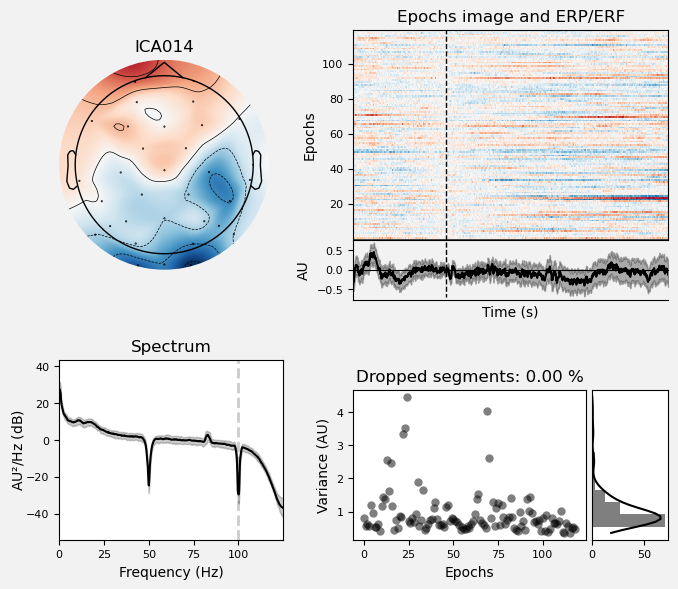

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


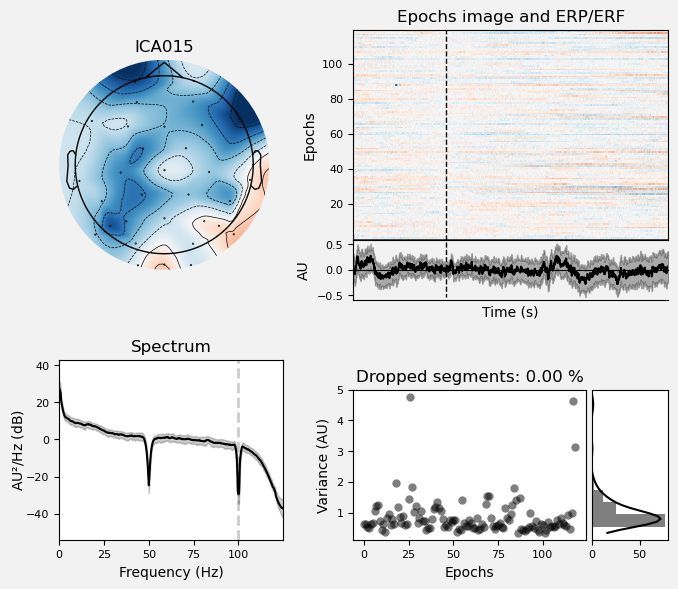

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


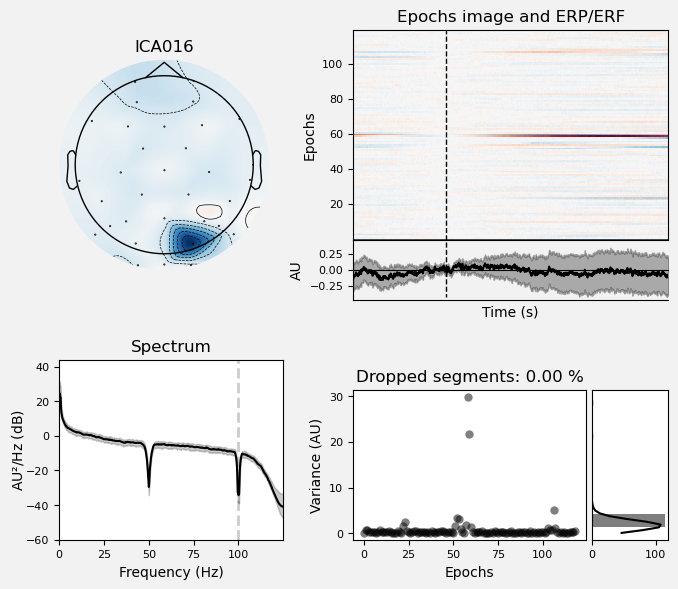

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


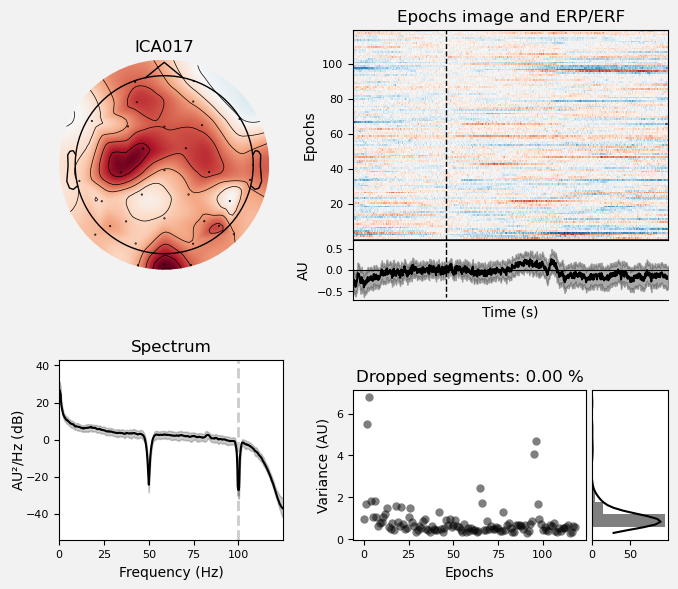

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


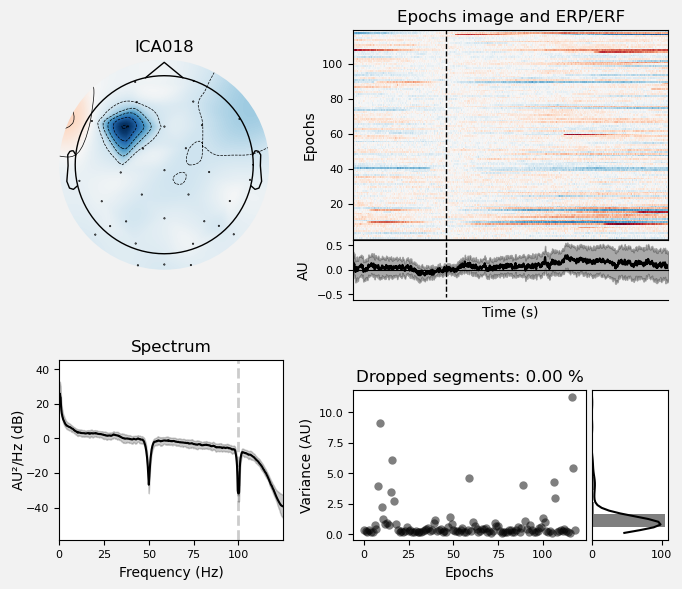

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


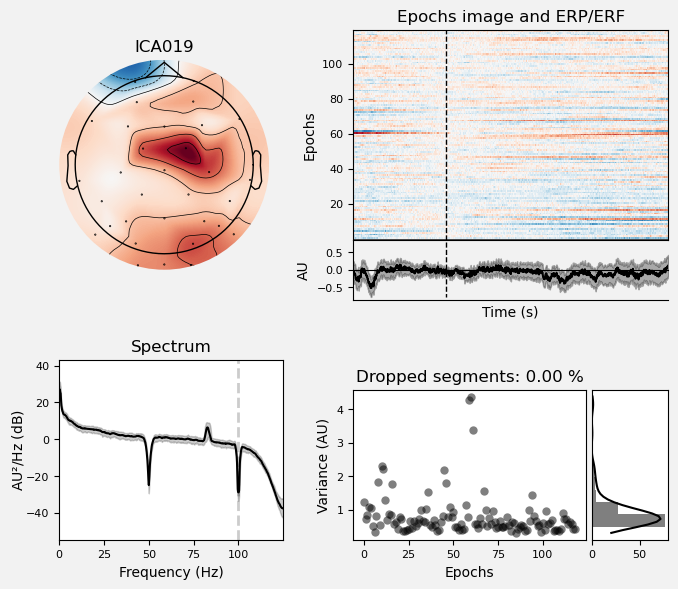

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


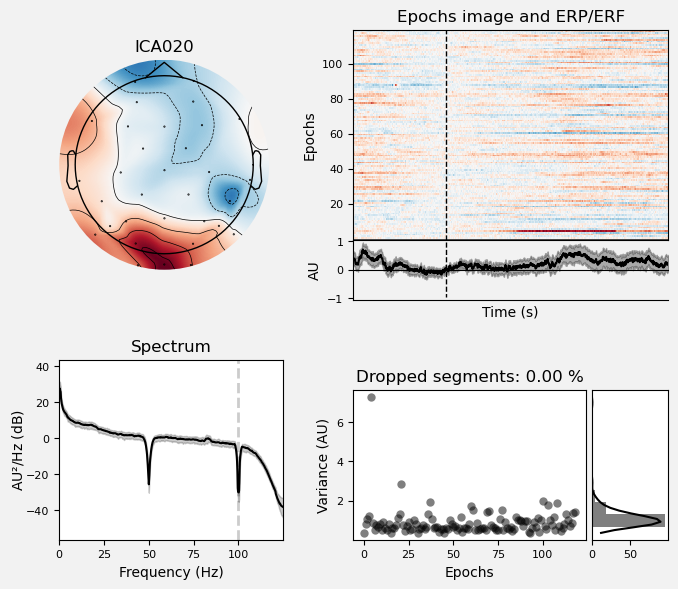

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


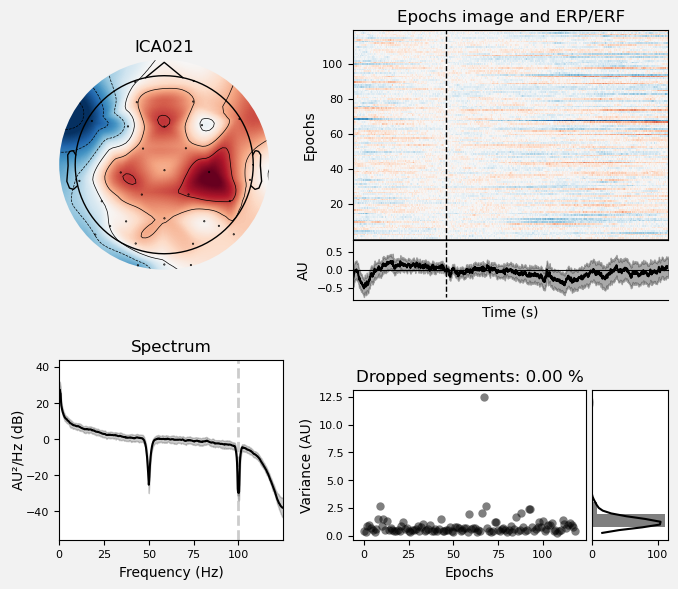

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


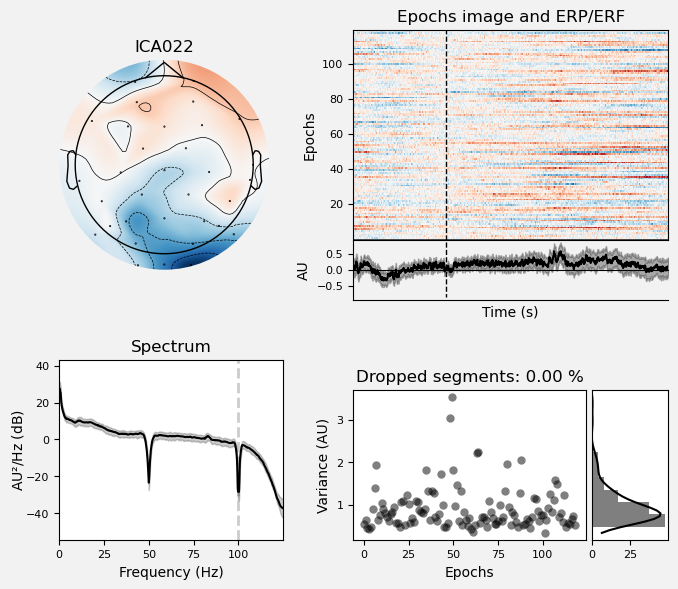

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


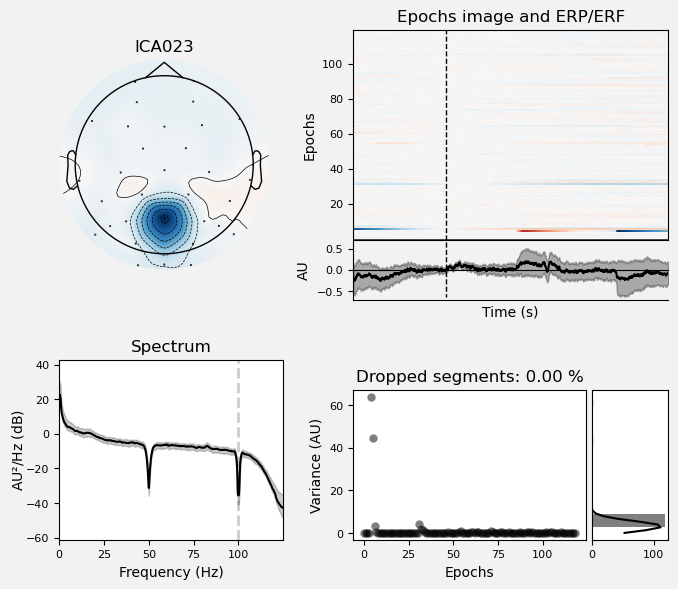

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


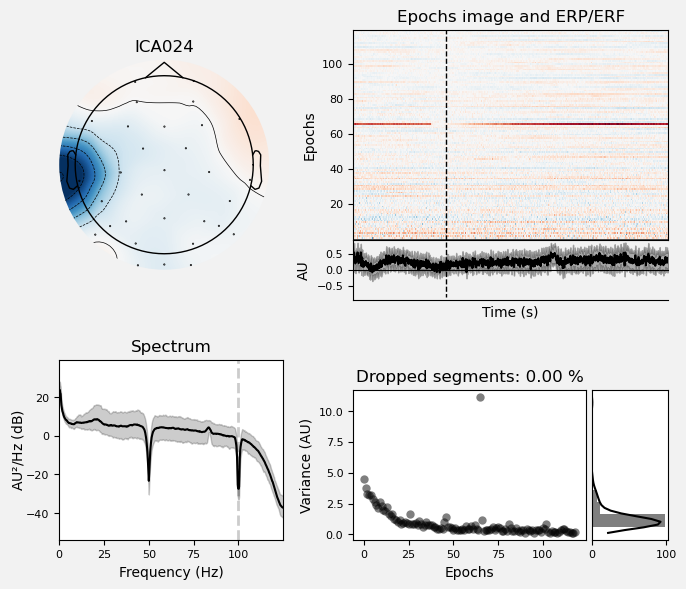

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


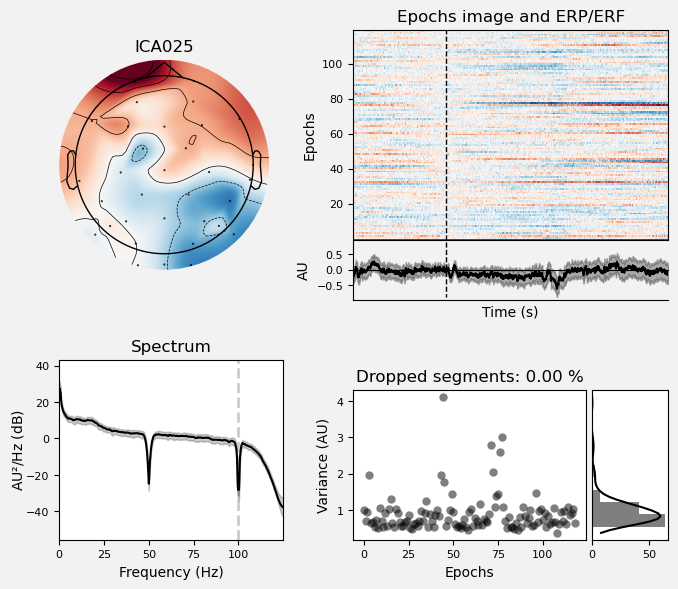

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


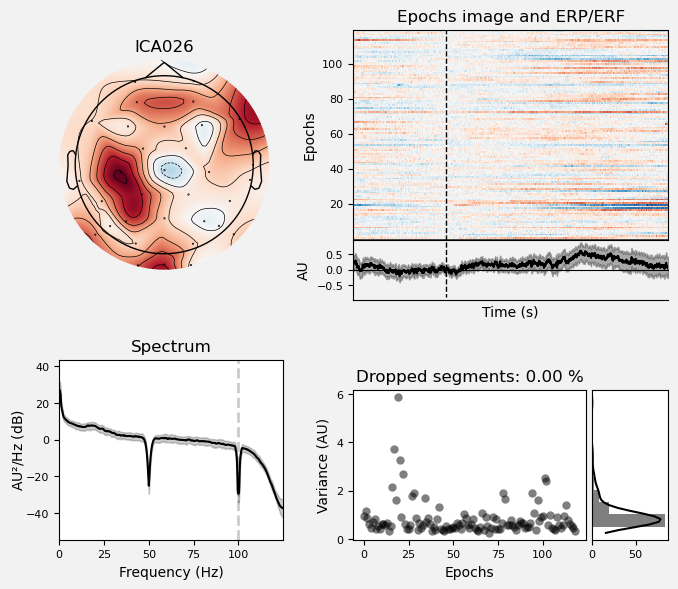

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


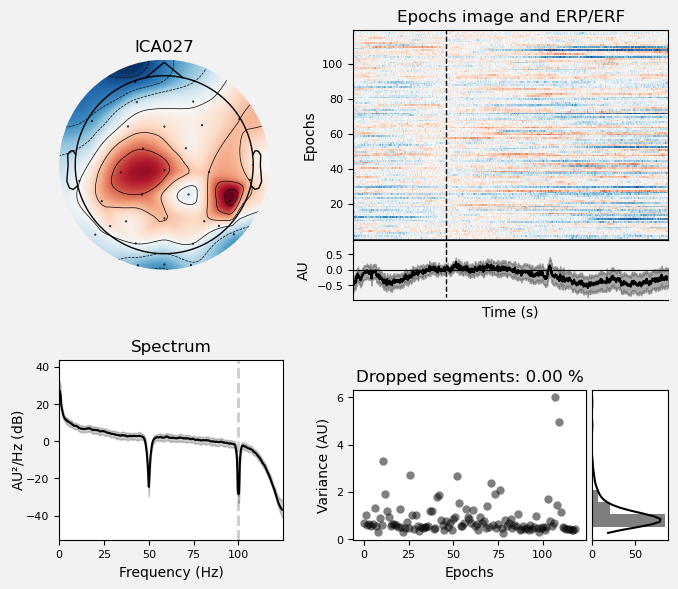

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


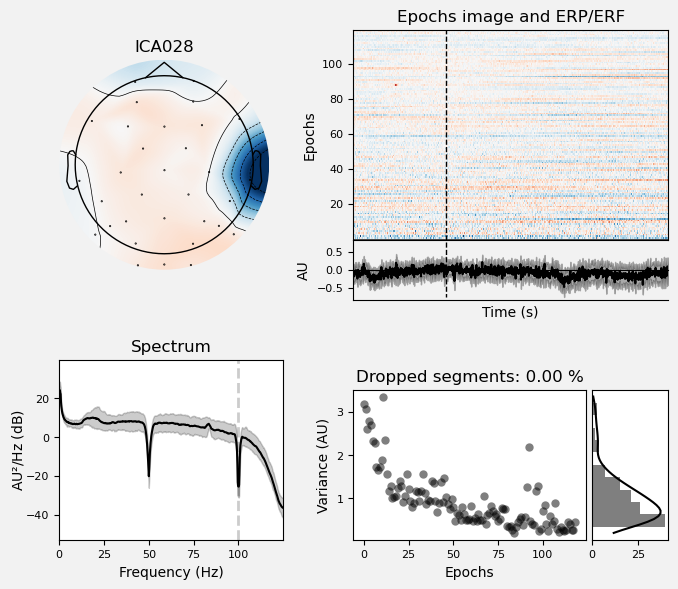

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


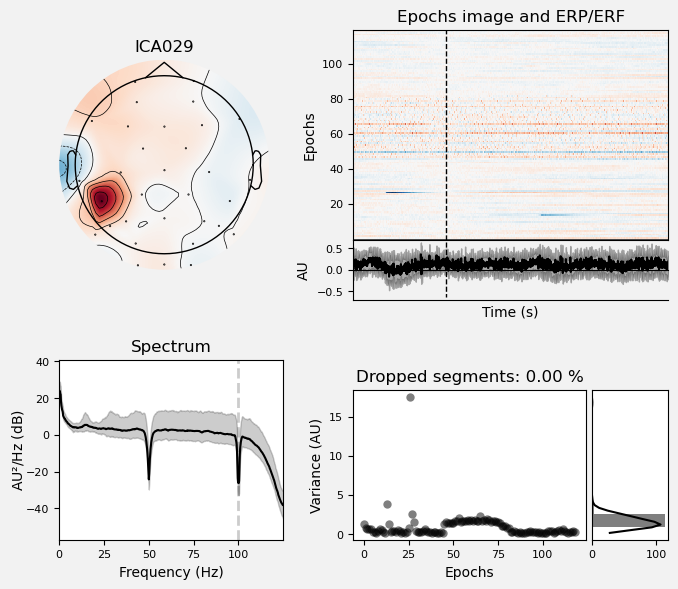

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


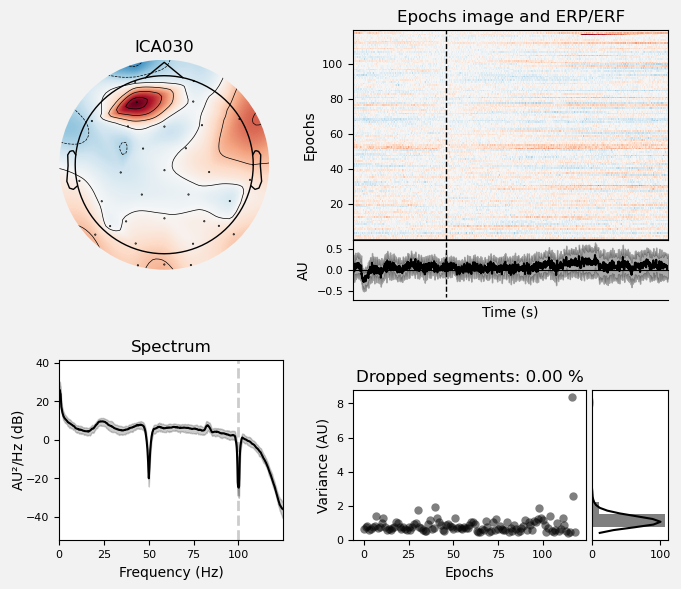

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
119 matching events found
No baseline correction applied
0 projection items activated


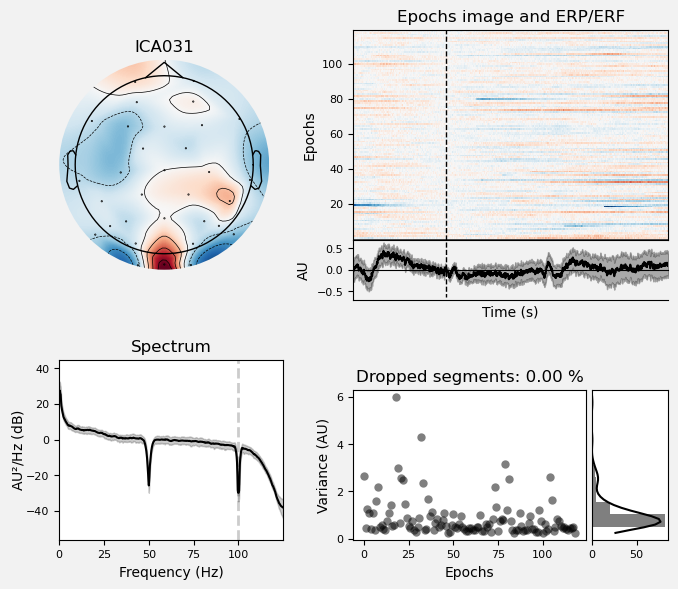

In [6]:
# plot properties based on epochs
# Find events related to the 'fixation' stim channel
stim_channel_name = 'fixation'
event_id = {'fixation': 1}
events = mne.find_events(raw, stim_channel=stim_channel_name, min_duration=1/raw.info['sfreq'])

# Create epochs
tmin, tmax = -1.5, 3.58  # Define the time range of epochs 3.583s-5.05s
epochs = mne.Epochs(raw, events, event_id=event_id, tmin=tmin, tmax=tmax, baseline=(0, 0), preload=True)

# Apply ICA to the epochs
ica_epochs = ica.apply(epochs.copy(), exclude=ica.exclude)

# Plot properties for each component using segments based on epochs
for idx in range(ica.n_components_):
    ica.plot_properties(ica_epochs, picks=idx)

In [7]:
jupyter-notebook stop

SyntaxError: invalid syntax (1442381797.py, line 1)

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 20 ICA components
    Projecting back using 32 PCA components


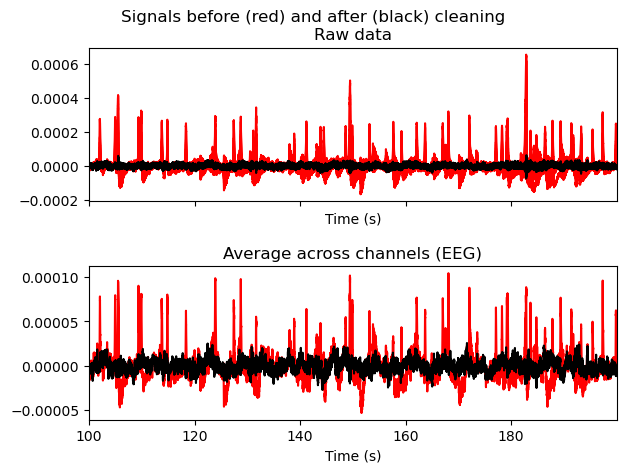

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 20 ICA components
    Projecting back using 32 PCA components


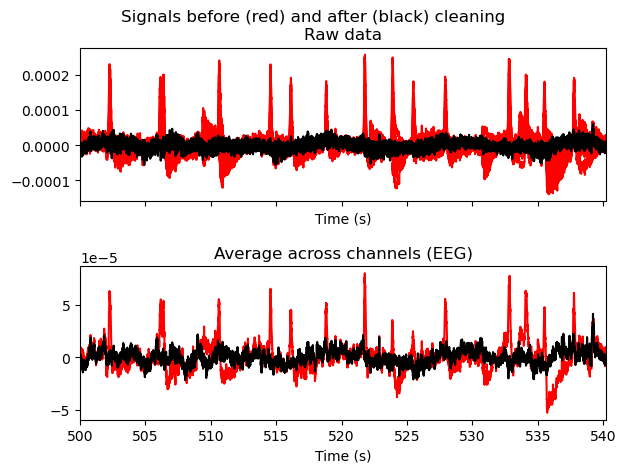

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 20 ICA components
    Projecting back using 32 PCA components


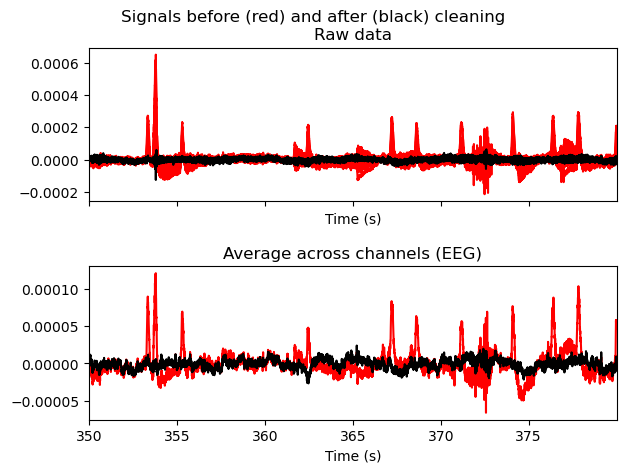

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 20 ICA components
    Projecting back using 32 PCA components


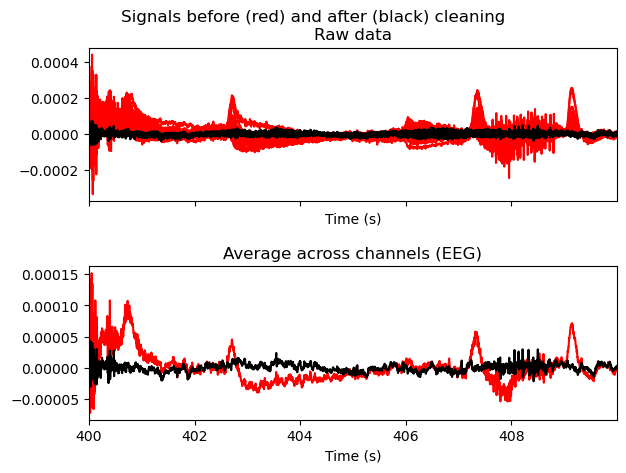

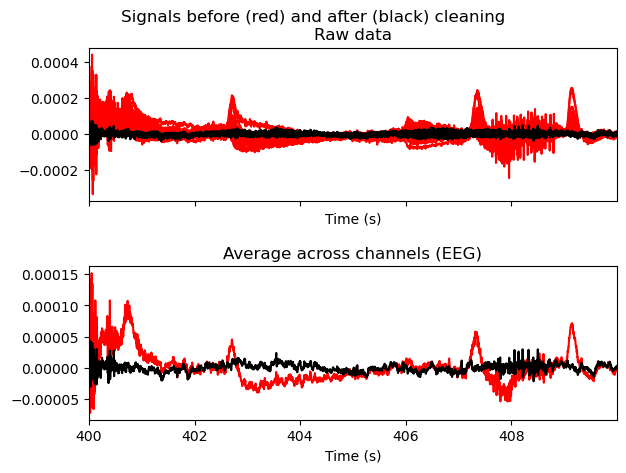

Closing ica-browser...


In [ ]:
# Load the CSV file
csv_file = 'ic_to_remove.csv'
df = pd.read_csv(csv_file)

# Get the remove_ic
selected_row = df.loc[(df['subject_id'] == subject_id) & (df['before_or_after'] == before_or_after)]
remove_ic = selected_row['remove_ic'].iloc[0].split(',')

# plot overlay
ica.plot_overlay(raw, exclude=remove_ic, picks='eeg', start=100., stop=200.)
# ica.plot_overlay(raw, exclude=remove_ic, picks='eeg', start=200., stop=230.)
ica.plot_overlay(raw, exclude=remove_ic, picks='eeg', start=500., stop=600.)
ica.plot_overlay(raw, exclude=remove_ic, picks='eeg', start=350., stop=380.)
ica.plot_overlay(raw, exclude=remove_ic, picks='eeg', start=400., stop=410.)

In [ ]:
# # Load the CSV file
# csv_file = 'ic_to_remove.csv'
# df = pd.read_csv(csv_file)

# # Get the remove_ic
# selected_row = df.loc[(df['subject_id'] == subject_id) & (df['before_or_after'] == before_or_after)]
# remove_ic = selected_row['remove_ic'].iloc[0].split(',')

# # # Get the other
# # other = selected_row['other'].iloc[0].split(',')

# # # Combine the two lists
# # remove_ic = remove_ic + other

# # Remove the components
# ica.exclude = [int(i) for i in remove_ic]
# raw_ica_applied = raw.copy()
# ica.apply(raw_ica_applied)

# # Plot the raw and ICA-applied data
# raw.plot(block=True)
# raw_ica_applied.plot(block=True)

Applying ICA to Raw instance
    Transforming to ICA space (32 components)
    Zeroing out 15 ICA components
    Projecting back using 32 PCA components
Opening raw-browser...
Closing raw-browser...
Channels marked as bad:
none
